# 0. Setup

### Import libraries

In [115]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
%matplotlib notebook

### Initialize Blocksci

In [116]:
# Import blocksci
import blocksci

# Create a Blockhain object
# parser_data_directory should be set to the data-directory which the blocksci_parser output
parser_data_directory = "/home/ubuntu/data/blocksci.conf"
chain = blocksci.Blockchain(parser_data_directory)

# 1. Basic stats

### How many blocks are there in the blockchain?

In [7]:
# The number of blocks is the length of the chain
%time num_blocks = len(chain)
print(num_blocks)

CPU times: user 6 µs, sys: 7 µs, total: 13 µs
Wall time: 15 µs
653853


### What is the size of all serialized blocks in the blockchain?

In [10]:
# The size of the chain is the sum of the sizes of the blocks 
%time blockchain_size = sum([block.size_bytes for block in chain])
print(blockchain_size)

CPU times: user 658 ms, sys: 0 ns, total: 658 ms
Wall time: 657 ms
306258808815


In [11]:
# Using the fluent interface is faster:
# https://citp.github.io/BlockSci/fluent-interface.html
%time blockchain_size = sum([b for b in chain.blocks.select(lambda b: b.size_bytes)])
print(blockchain_size)

CPU times: user 483 ms, sys: 0 ns, total: 483 ms
Wall time: 481 ms
306258808815


In [12]:
# Convert sizes in bytes to gigabytes for readability
def bytes_to_gb(s):
    return s/1024**3

print(bytes_to_gb(blockchain_size))

285.2257423242554


### How many transactions are there in the blockchain?

In [12]:
# The number of transactions of a block is the length of the block
# and the sum of transactions of each block is the total number of transactions in the chain
%time total_num_transactions = sum([len(block) for block in chain])
print(total_num_transactions)

CPU times: user 783 ms, sys: 249 ms, total: 1.03 s
Wall time: 1.03 s
580137370


### <span style="color:blue">Activity 1.1:</span>  
### How many transactions are there in the first 100 blocks of the blockchain? And in the last 100 blocks?

In [119]:
first100blocksTRX = sum([len(block) for block in chain[:100]])
print('There are', first100blocksTRX, 'transactions in the first 100 blocks of the blockchain. ')
last100blockTRX = sum([len(block) for block in chain[len(chain)-100:]])
print('There are', last100blockTRX, 'transactions in the last 100 blocks of the blockchain. ')
    

There are 100 transactions in the first 100 blocks of the blockchain. 
There are 241676 transactions in the last 100 blocks of the blockchain. 


# 2. Basic queries

### Which is the hash of the block with the most number of transactions?

In [16]:
%time num_transactions = [len(block) for block in chain]
# Get max. number of transactions
m = max(num_transactions)
# Get height of the block with the most transactions
height = num_transactions.index(m)
# Retrieve hash
h = chain[height].hash

print("The block with the most number of transactions is at height {} and has {} transactions". format(height, m))
print("Block hash: {}".format(h))

CPU times: user 833 ms, sys: 0 ns, total: 833 ms
Wall time: 832 ms
The block with the most number of transactions is at height 367853 and has 12239 transactions
Block hash: 00000000000000001080e6de32add416cd6cda29f35ec9bce694fea4b964c7be


In [17]:
# An alternative, using numpy:
height = np.argmax(num_transactions)
m = len(chain[height])
h = chain[height].hash

print("The block with the most number of transactions is at height {} and has {} transactions". format(height, m))
print("Block hash: {}".format(h))

The block with the most number of transactions is at height 367853 and has 12239 transactions
Block hash: 00000000000000001080e6de32add416cd6cda29f35ec9bce694fea4b964c7be


### Which is the transaction in block 123456 with the most value in outputs?

In [18]:
# Get block
block = chain[123456]
# Get output amounts per transaction
outvalue_per_tx = [tx.output_value for tx in block]  # Select max amount
max_value = max(outvalue_per_tx)
tx_index = outvalue_per_tx.index(max_value)
# Retrieve hash
tx = block.txes[tx_index].hash
print("The transaction with the most value in outputs (block 123456) is {} and has {} satoshis". format(tx_index, max_value))
print("Tx hash: {}".format(tx))

The transaction with the most value in outputs (block 123456) is 0 and has 5005000000 satoshis
Tx hash: 5b75086dafeede555fc8f9a810d8b10df57c46f9f176ccc3dd8d2fa20edd685b


In [19]:
# Converts satoshi to btc
def satoshis_to_btc(v):
    return v/10**8

In [20]:
max_value_btc = satoshis_to_btc(max_value)
print("The transaction with the most value in outputs (block 123456) has {} btc". format(max_value_btc))

The transaction with the most value in outputs (block 123456) has 50.05 btc


### <span style="color:blue">Activity 2.1:</span>  
### Which is the hash of the transaction whose output is spent by the input of the second transaction of block 200000?



In [137]:
block = chain[199999] #we take 199 999 because of index 0
inputs=block.txes[1].inputs

print('The second transacion of block 200000 have', len(inputs), 'inputs.')
print('The hashes of the transactions whose outputs are the spent by these inputs are: ')

for input in inputs:
    spentTxs = [input.spent_tx]
    for spentTX in spentTxs:
        txhash = spentTX.hash
    print(txhash)
        


The second transacion of block 200000 have 2 inputs.
The hashes of the transactions whose outputs are the spent by these inputs are: 
7050b98c4215a00522ef90cfe13f45ddf2a4a199d348f377f56b0a47f5ee18e4
c410d173abbb7b0e4057d016cf67c100d3514e66d446b137cb021d6987982bbb


### <span style="color:blue">Activity 2.2:</span>  
### Which is the hash of the transaction whose input spends the second output of the second transaction of block 200000?


In [138]:
block = chain[199999] #we take 199 999 because of index 0

outputs=block.txes[1].outputs #we take the outputs of the second transaction
secondTXSpend = outputs[1].spending_tx #we take the transaction that spends the second output
TX_hash = secondTXSpend.hash #we take the hash of the transaction
print('The hash of the transaction whose input spends the second output of the second transaction of block 200000 is:')
print(TX_hash)

The hash of the transaction whose input spends the second output of the second transaction of block 200000 is:
1a40d11f1a8ac43c6e055549de0b323e4aa99dd7473b4aec85a7d4c044027807


### How many blocks do not have any fees at all?

In [23]:
# Get blocks without fees
%time blocks_without_fees = sum([1 for _ in chain.blocks.where(lambda bl: bl.fee == 0)])
# Show how many did we find
print("There are {} blocks without paying any fees to the miner".format(blocks_without_fees))

CPU times: user 15.8 s, sys: 19.8 s, total: 35.6 s
Wall time: 3min 32s
There are 125287 blocks without paying any fees to the miner


### ... and how many of them are older than height 125000?

In [24]:
%time blocks_without_fees_prev125K = sum([1 for _ in chain[125000:].where(lambda bl: bl.fee == 0)])
# Show how many did we find
print("There are {} blocks without paying any fees to the miner".format(blocks_without_fees))

CPU times: user 11.1 s, sys: 0 ns, total: 11.1 s
Wall time: 11.1 s
There are 125287 blocks without paying any fees to the miner


### <span style="color:blue">Activity 2.3:</span>  
### How could we answer questions 2.1 and 2.2 using only Bitcoin Core block files?

**Answer:** 
To find out who spent the txout or the transaction whose output is spent by the input of the second, if we know the block, we can iterate through all the blocks to the last arrived one (getblock) and the mempool (getrawmempool), while checking every transaction:
 
foreach(var input in tx.inputs)
{​​​​
   if(input.prevout.txid == myTxo.txid && input.prevout.index == myTxo.index)
   {​​​​
      // tx spent the txo we were looking for
   }​​​​
}​​​​

### <span style="color:blue">Activity 2.4:</span>  
### Is there any miner that did not collect his/her full reward (block reward + fees)?

In [135]:
#first transaction has no inputs and 
#generates the number of bitdcoins depending 
#on height and the difference betrween inputs/outputs that are fees
#look inputs and outputs

miners=0

def getHalving(year):
    halving=50
    for i in range(year):
        halving/=2
    return halving


for block in chain[:]:
    halvingYear = int(block.height/210000)
    if ((block.fee + ((getHalving(halvingYear)))*100000000) != block.revenue):
        miners += 1

print('There are', miners, 'miners that did not collected the full reward. ')




There are 1123 miners that did not collected the full reward. 


### <span style="color:blue">Activity 2.5:</span>  
###  Is there any miner that did not even collect the block reward?

In [136]:
miners=0

for block in chain[:]:
    halvingYear = int(block.height/210000)
    if (block.revenue < ((getHalving(halvingYear))*100000000)):
        miners += 1

print('There are', miners, 'miners that did not collected the block reward. ')


There are 3 miners that did not collected the block reward. 


# 3. Plots with block and transaction data

### How many transactions per block are there?

In [147]:
# Get number of transactions per block
%time num_transactions = [(block.height, len(block)) for block in chain]

CPU times: user 1.08 s, sys: 35.6 ms, total: 1.11 s
Wall time: 1.11 s


<IPython.core.display.Javascript object>


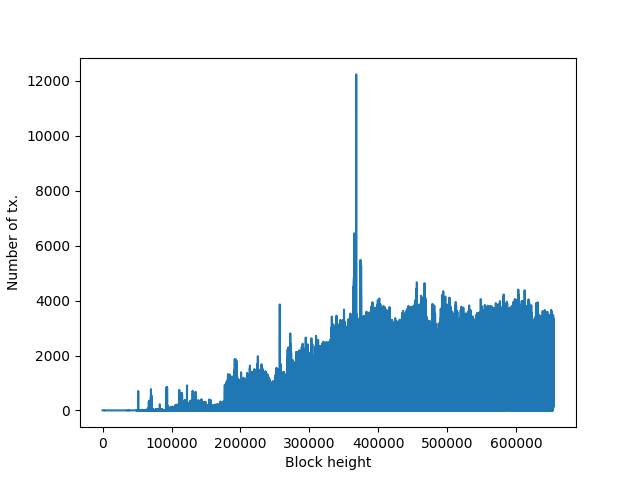

In [148]:
# Plot number of transactions vs block height
fig, ax = plt.subplots()
df_num_tx = pd.DataFrame(num_transactions, columns=["Height", "Num. of tx"])
ax.plot(df_num_tx["Height"], df_num_tx["Num. of tx"])
plt.xlabel("Block height")
_ = plt.ylabel("Number of tx.")

In [37]:
# We can use heights_to_dates to convert block heights into dates
df_num_tx_dates = chain.heights_to_dates(df_num_tx)

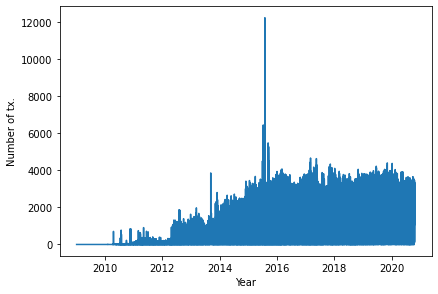

In [38]:
# Plot number of transactions vs date
fig, ax = plt.subplots()
ax.plot(df_num_tx_dates.index, df_num_tx_dates["Num. of tx"])
plt.tight_layout()
plt.xlabel("Year")
_ = plt.ylabel("Number of tx.")

#### Which is the first block with more than one transaction?

In [39]:
for (height, num_tx) in num_transactions:
    if num_tx > 1:
        break
        
print("The first block with more than one transaction is at height {}".format(height))

The first block with more than one transaction is at height 170


### Are blocks currently full?

In [40]:
# Get block sizes
%time block_sizes = [(block.height, block.size_bytes) for block in chain]

CPU times: user 1.16 s, sys: 14.2 ms, total: 1.17 s
Wall time: 1.17 s


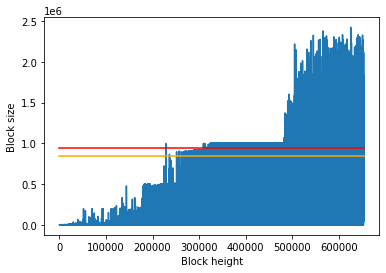

In [41]:
# Plot block size vs block height
fig, ax = plt.subplots()
df_num_tx = pd.DataFrame(block_sizes, columns=["Height", "Block size (bytes)"])
ax.plot(df_num_tx["Height"], df_num_tx["Block size (bytes)"])
plt.xlabel("Block height")
plt.ylabel("Block size")
# Show an orange line on 80% of max. block size, red line on 90%
max_block_size = 1024*1024
ax.plot([0, num_blocks], [0.8*max_block_size, 0.8*max_block_size], "orange")
ax.plot([0, num_blocks], [0.9*max_block_size, 0.9*max_block_size], 'r')

### How does difficulty evolve?

Generate a plot of bits (difficulty) vs height for blocks between 100000 and 110000

In [42]:
# Get block difficulties
%time block_bits = [(block.height, block.bits) for block in chain[100000:110000]]

CPU times: user 17 ms, sys: 212 µs, total: 17.2 ms
Wall time: 17 ms


Text(1.75, 0.5, 'Bits')

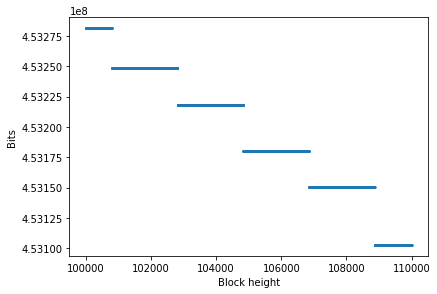

In [43]:
# Plot block difficulties versus height
fig, ax = plt.subplots()
df_bits = pd.DataFrame(block_bits, columns=["Height", "Bits"])
plt.scatter(df_bits["Height"], df_bits["Bits"], s=1)
plt.tight_layout()
plt.xlabel("Block height")
plt.ylabel("Bits")

### What kind of scripts are used in blocks?

In [56]:
# Get address type per block
%time net_coins_per_block = chain.map_blocks(lambda block: block.net_address_type_value())

CPU times: user 7.57 s, sys: 389 ms, total: 7.96 s
Wall time: 10.4 s


In [57]:
# net_address_type_value() returns a dictionary for each block:
net_coins_per_block[400000]

{address_type.pubkeyhash: 5683726085,
 address_type.scripthash: -3183733885,
 address_type.multisig: 7800,
 address_type.nulldata: 0}

(0.0, 13313558.286967054)

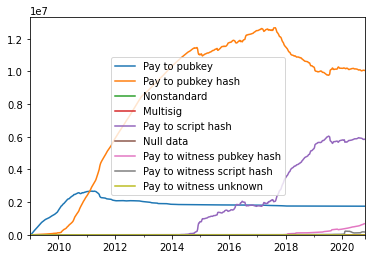

In [58]:
# Fill non existing entries with 0 and convert satoshis to btc
df = pd.DataFrame(net_coins_per_block).fillna(0).cumsum()/1e8
# Convert block heights to dates
df = chain.heights_to_dates(df)
# Convert column names (e.g. pubkeyhash -> 'Pay to pubkey hash')
df = df.rename(columns={t:str(t) for t in df.columns})
# Resample weekly and plot
ax = df.resample("W").mean().plot()
ax.set_ylim(ymin=0)

### What is the hash of the first transaction with a multisignature output?

In [59]:
for i, b in enumerate(net_coins_per_block):
    if blocksci.address_type.multisig in b.keys():
        print("Block at height {} has the first multisig output".format(i))
        # Let's find the transaction that has it
        for tx in chain[i]:
            for out in tx.outs:
                if out.address_type == blocksci.address_type.multisig:
                    print("Transaction {} has the first multisig ever".format(tx.hash))
        break

Block at height 164467 has the first multisig output
Transaction 60a20bd93aa49ab4b28d514ec10b06e1829ce6818ec06cd3aabd013ebcdc4bb1 has the first multisig ever


### A note on resampling: how much fees were paid by block?

In [156]:
# Get fees per block
%time fees_per_block = [(block.time, block.fee) for block in chain]

CPU times: user 12.8 s, sys: 662 ms, total: 13.5 s
Wall time: 13.5 s


0


<IPython.core.display.Javascript object>


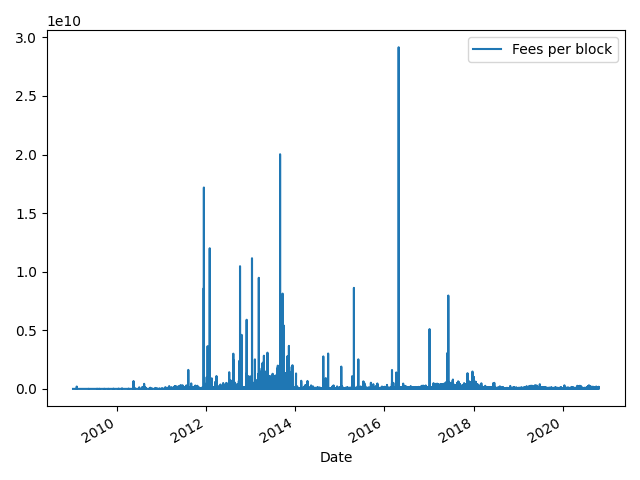

In [161]:
# Load data into dataframe
df_fees_block = pd.DataFrame(fees_per_block, columns=["Date", "Fees per block"])
# Set dataframe index as date
df_fees_block.index = df_fees_block["Date"]
del df_fees_block["Date"]

# Resample?
# df_fees_block = df_fees_block.resample("w").mean()
# df_fees_block = df_fees_block.resample("m").mean()
df_fees_block.plot()
plt.tight_layout()

### <span style="color:blue">Activity 3.1:</span>  
### Generate two plots showing the fees per byte payed by each transaction in block 200000 and block 450000. Which block is paying the highest fees per byte?

**Answer:** As we calculated the average of the fees per byte in each block, we got that even block 450000 had a higher fee summary it also had a bigger size, so after comparing both values, block 200000 got a fees per byte average of 190.494 and block 450000 got a fees per byte average of 132.654, being block 200000 the one who is paying the highest fees per byte. 

<IPython.core.display.Javascript object>


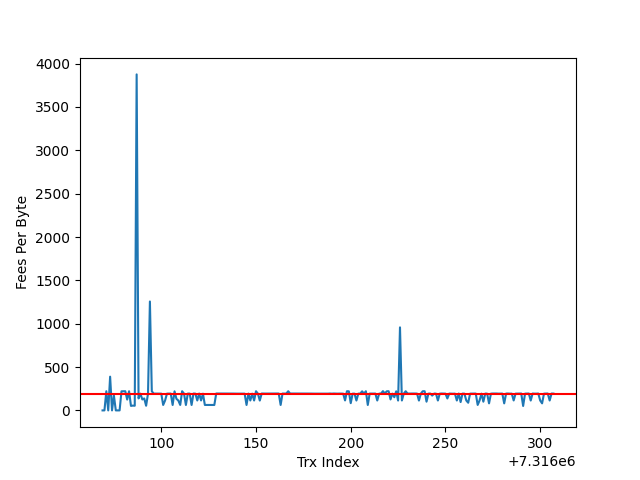

190.4945394306214


In [249]:
#block 200 000
#X axis -> transaction
#Y axis -> fees/byte
####OR 
# X = bytes
# Y = fees 
# points with area equal to nTrx


trx_feesByte = [((trx.fee/trx.base_size),trx.index) for trx in chain[199999]]


fig, ax = plt.subplots()
dftrx_feesByte = pd.DataFrame(trx_feesByte, columns=["Fees Per Byte", "Trx Index"])
ax.plot( dftrx_feesByte["Trx Index"],dftrx_feesByte["Fees Per Byte"])
plt.ylabel("Fees Per Byte")
plt.xlabel("Trx Index")
sumFeesByte = 0
nTrx = chain[199999].tx_count
for feesxByte in trx_feesByte:
    sumFeesByte += feesxByte[0]
# Show an orange line on average fees/byte
#print((sumFeesByte/nTrx))
mitjana = sumFeesByte/nTrx
#ax.plot([0, num_blocks], [0.8*max_block_size, 0.8*max_block_size], "orange")
plt.axhline(y=mitjana, color='r', linestyle='-')
print(mitjana)


<IPython.core.display.Javascript object>


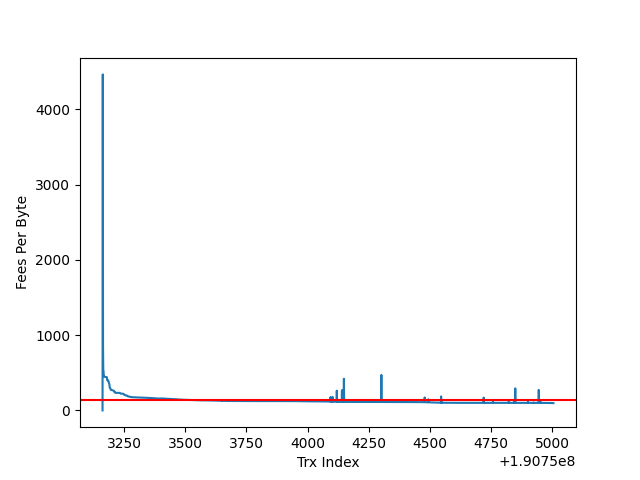

132.65440875227063


In [248]:
trx_feesByte2 = [((trx.fee/trx.base_size),trx.index) for trx in chain[449999]]


fig2, ax2 = plt.subplots()
df_num_tx = pd.DataFrame(trx_feesByte2, columns=["Fees Per Byte", "Trx Index"])
ax2.plot( df_num_tx["Trx Index"],df_num_tx["Fees Per Byte"])
plt.ylabel("Fees Per Byte")
plt.xlabel("Trx Index")
sumFeesByte2 = 0
nTrx2 = chain[449999].tx_count
for feesxByte2 in trx_feesByte2:
    sumFeesByte2 += feesxByte2[0]
# Show an orange line on average fees/byte
#print((sumFeesByte/nTrx))
mitjana2 = sumFeesByte2/nTrx2
#ax.plot([0, num_blocks], [0.8*max_block_size, 0.8*max_block_size], "orange")
plt.axhline(y=mitjana2, color='r', linestyle='-')
print(mitjana2)